In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load u.info
u_info_path = '../data/raw/u.info'
u_info = open(u_info_path, 'r').read()
print(u_info)

943 users
1682 items
100000 ratings



# Show data

In [3]:
# Load u.item
u_item_path = '../data/raw/u.item'
u_item = pd.read_csv(u_item_path, sep='|', encoding='latin-1', names=['movie_id', 'title', 'release_date', 'video_release_date', 'IMDB_URL'] + ['genre_' + str(i) for i in range(19)], usecols=range(24))
u_item.head()

,movie_id,title,release_date,video_release_date,IMDB_URL,genre_0,genre_1,genre_2,genre_3,genre_4,...,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
# Load u.genre
u_genre_path = '../data/raw/u.genre'
u_genre = pd.read_csv(u_genre_path, sep='|', names=['genre', 'genre_id'])
u_genre

,genre,genre_id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [5]:
# Load u.user
u_user_path = '../data/raw/u.user'
u_user = pd.read_csv(u_user_path, sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])
u_user.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
# Load u.occupation
u_occupation_path = '../data/raw/u.occupation'
u_occupation = open(u_occupation_path, 'r').readlines()
u_occupation

['administrator\n',
 'artist\n',
 'doctor\n',
 'educator\n',
 'engineer\n',
 'entertainment\n',
 'executive\n',
 'healthcare\n',
 'homemaker\n',
 'lawyer\n',
 'librarian\n',
 'marketing\n',
 'none\n',
 'other\n',
 'programmer\n',
 'retired\n',
 'salesman\n',
 'scientist\n',
 'student\n',
 'technician\n',
 'writer\n']

In [7]:
# Load one of the data files
u_data = pd.read_csv('../data/raw/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
u_data.head(10)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [8]:
u_data.dtypes

user_id      int64
item_id      int64
rating       int64
timestamp    int64
dtype: object

In [9]:
u_data.isna().any()

user_id      False
item_id      False
rating       False
timestamp    False
dtype: bool

In [10]:
u_data.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


Rating distribution
===

<AxesSubplot: >

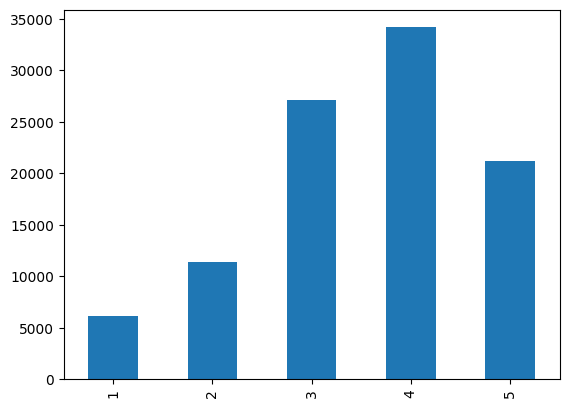

In [11]:
u_data['rating'].value_counts().sort_index().plot(kind='bar')

Most popular films
===

In [12]:

u_data.groupby('item_id')['rating'].agg(['count', 'mean']).sort_values(by='count', ascending=False)

,count,mean
item_id,,
50,583,4.358491
258,509,3.803536
100,508,4.155512
181,507,4.007890
294,485,3.156701
...,...,...
1576,1,1.000000
1577,1,1.000000
1348,1,1.000000


Check for any seasonal patterns
===

<AxesSubplot: xlabel='datetime'>

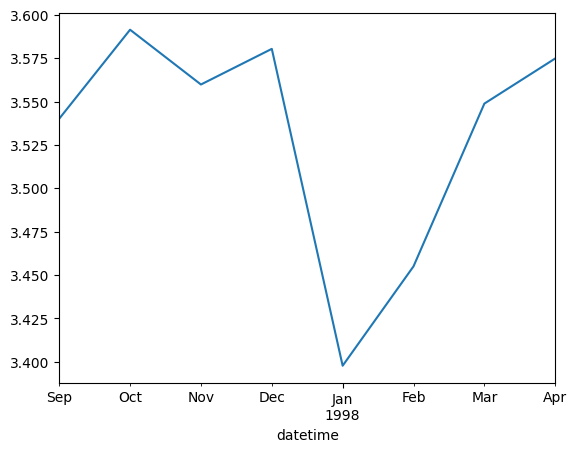

In [13]:
u_data['datetime'] = pd.to_datetime(u_data['timestamp'], unit='s')
u_data.set_index('datetime')['rating'].resample('M').mean().plot()

Rating per movie and user distribution
===

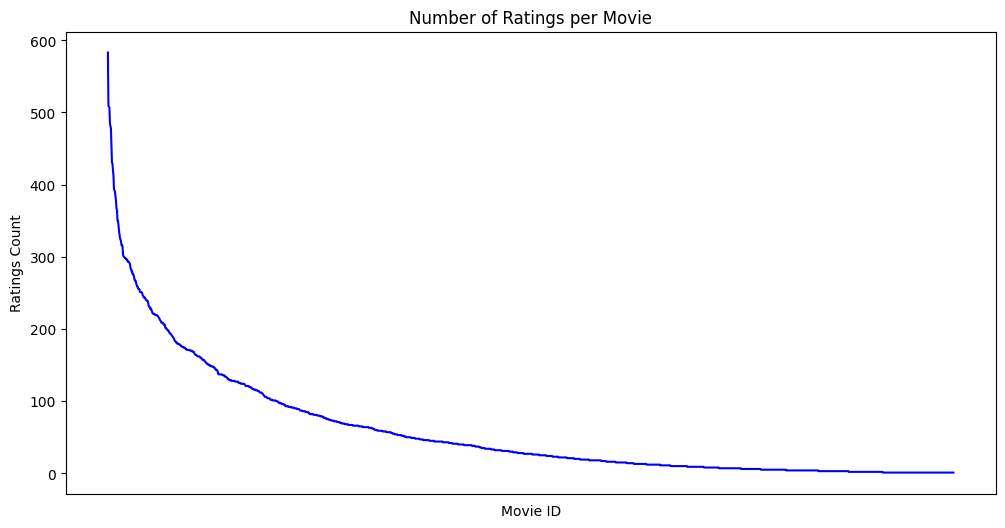

In [14]:
# Count ratings per movie
ratings_per_movie = u_data['item_id'].value_counts().sort_index()
ratings_per_movie_sorted = u_data['item_id'].value_counts().sort_values(ascending=False)
# Line plot for number of ratings per movie
plt.figure(figsize=(12, 6))
plt.plot(ratings_per_movie.index, ratings_per_movie_sorted.values, linestyle='-', marker='', color='b')
plt.title('Number of Ratings per Movie')
plt.xlabel('Movie ID')
plt.ylabel('Ratings Count')
plt.xticks([])  # Hides x-axis labels
plt.show()


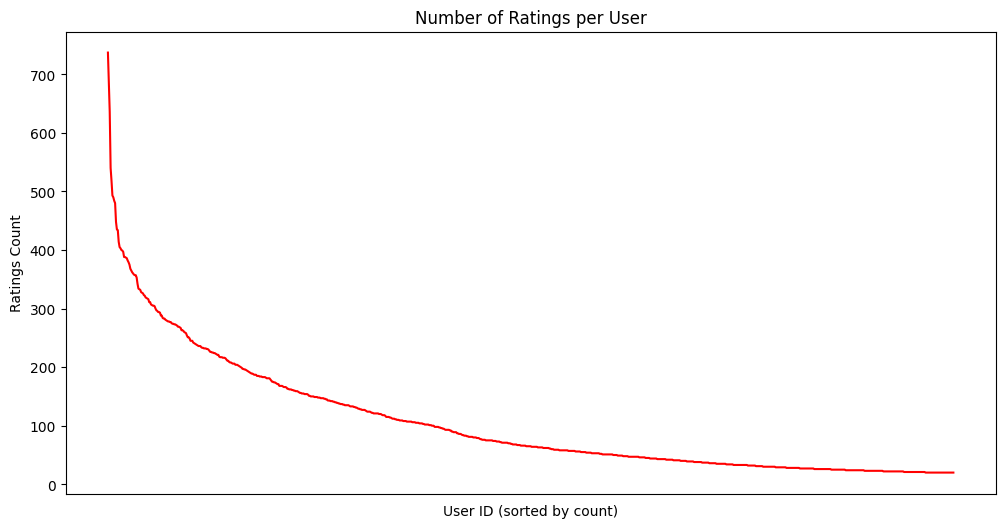

In [15]:
# Count ratings per user and sort
ratings_per_user_sorted = u_data['user_id'].value_counts().sort_values(ascending=False)

# Line plot for number of ratings per user
plt.figure(figsize=(12, 6))
plt.plot(ratings_per_user_sorted.values, linestyle='-', marker='', color='r')
plt.title('Number of Ratings per User')
plt.xlabel('User ID (sorted by count)')
plt.ylabel('Ratings Count')
plt.xticks([])  # Hides x-axis labels
plt.show()


In [16]:
ratings_per_user_sorted = u_data['user_id'].value_counts().sort_values(ascending=False)
ratings_per_user_sorted

405    737
655    685
13     636
450    540
276    518
      ... 
596     20
19      20
242     20
926     20
93      20
Name: user_id, Length: 943, dtype: int64

Genres distribution
===

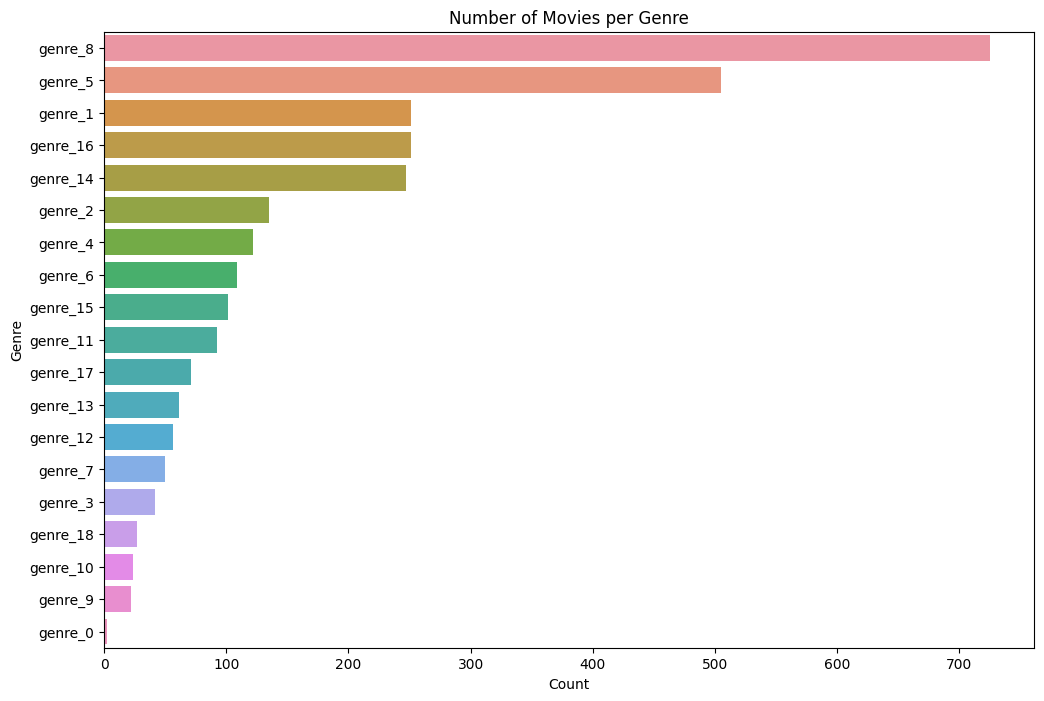

In [17]:
# Summing up the genre columns and sorting
genre_counts_sorted = u_item.iloc[:, 5:].sum().sort_values(ascending=False)

# Bar plot for number of movies per genre
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts_sorted.values, y=genre_counts_sorted.index)
plt.title('Number of Movies per Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()
